# Ejemplo Red Neuronal con sigmoide (regresión logística)

In [18]:
import tensorflow as tf
import numpy as np

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[1],[0],[0],[1]])

Declaracion de variables

In [21]:
input_size=2
output_layer_size=1
#Los placeholders son para los datos de entrada
x_ = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size]) #la y real
#La variables para lo que se va a ir calculando y modificando en el camino
W_layer1=tf.Variable(tf.random_uniform([input_size,2], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([2]), name="b_layer1")

W_layer2=tf.Variable(tf.random_uniform([input_size,output_layer_size], -1, 1), name="W_layer2")
b_layer2 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer2")



Operaciones, grafo

In [28]:
H = tf.nn.sigmoid(tf.matmul(x_,W_layer1)+b_layer1) #la de nuestra
y = tf.nn.sigmoid(tf.matmul(H,W_layer2)+b_layer2) #la de nuestra
loss = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)



In [29]:
init = tf.initialize_all_variables()
sess = tf.Session() # tipo de sesion, puede ser interactiva


Correr programa

In [58]:
sess.run(init)
for i in range(50000):
     sess.run(train_step, feed_dict={x_: X, y_: Y })

    

In [64]:
#imprimir alguna variable
print(sess.run(y, feed_dict={x_: X, y_: Y}))
print(sess.run(W_layer2, feed_dict={x_: X, y_: Y}))

[[ 0.95410633]
 [ 0.07250253]
 [ 0.50017601]
 [ 0.49245149]]
[[ 6.16938782]
 [ 3.64113593]]


Cuantificar Error

In [65]:
correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x_: X, y_: Y})) # las corremos

0.5


Visualizar Barrera de Decisión. Sacar las w del grafo de Tensorflow

In [66]:
w=[sess.run(b_layer2, feed_dict={x_: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer2, feed_dict={x_: X, y_: Y})]

In [ ]:
Donde vale $X_1$ cero y donde $X_2$ vale cero? $w_0+w_1X_1+w_2X_2 =0$. $X_1=\frac{-w_2X_2-w_0}{w_1}$ y $X_2=\frac{-w_1X_1-w_0}{w_2}$


Buscamos una recta que pasa por $\left(0,\frac{-w_0}{w_2}\right)$ y $\left(\frac{-w_0}{w_1},0\right)$, la pendiente es $\frac{\frac{-w_0}{w_2}-0}{0-\frac{-w_0}{w_1}}=\frac{-w_1}{w_2}$ 
La ordenada $y-y_1=m(x-x_1)$ es $y-\frac{-w_0}{w_2}=\frac{-w_1}{w_2} x$, $y=\frac{-w_1}{w_2} x+\frac{-w_0}{w_2}$


In [67]:
m=((w[0]/w[2]))/((-w[0]/w[1]))
print -w[0]/w[1], -w[0]/w[2], m

0.591361 1.00198 -1.69436


(-5.2, 5.2)

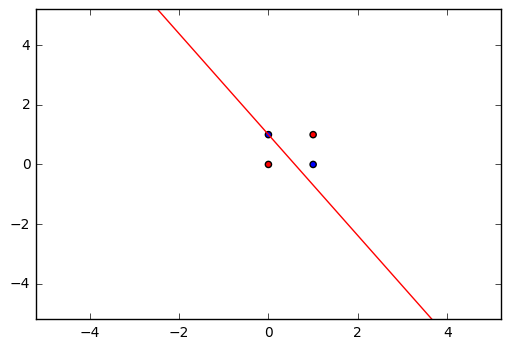

In [68]:
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
x2 = np.linspace(-5.2,5.2,100) # 100 numeros espaciados
plt.plot(x2,-w[0]/w[2]+m*x2,color='red')
plt.ylim([-5.2,5.2])
plt.xlim([-5.2,5.2])

In [26]:
sess.close()